# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Hildatul Wardah
- **Email:** Hildatulwardah@students.unnes.ac.id
- **ID Dicoding:** hildatul_wardah_GpI8

## Menentukan Pertanyaan Bisnis

- Apakah lebih banyak orang menyewa sepeda pada hari kerja dibandingkan akhir pekan?
- Apakah ada perbedaan jumlah penyewaan antara pagi, siang, dan malam?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [6]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- xxx
- xxx

In [20]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [21]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- xxx
- xxx

In [22]:
day_df.isna().sum()
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [23]:
print("Jumlah duplikasi data pada day.csv: ", day_df.duplicated().sum())
print("Jumlah duplikasi data pada hour.csv: ", hour_df.duplicated().sum())

Jumlah duplikasi data pada day.csv:  0
Jumlah duplikasi data pada hour.csv:  0


Pada tabel day_df terdapat 0 data yang double, artinya semua data bersifat unik.

In [24]:
day_df.describe()
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan data di atas, tidak terdapat keanehan.

### Cleaning Data

In [27]:
day_drop_cols = ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
day_df.drop(columns=[col for col in day_drop_cols if col in day_df.columns], inplace=True)


hour_drop_cols = ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
hour_df.drop(columns=[col for col in hour_drop_cols if col in hour_df.columns], inplace=True)


display(day_df.head())
display(hour_df.head())


,weekday,workingday,cnt
0,6,0,985
1,0,0,801
2,1,1,1349
3,2,1,1562
4,3,1,1600


,hr,cnt
0,0,16
1,1,40
2,2,32
3,3,13
4,4,1


In [29]:
day_df.rename(columns={

    'cnt': 'count'
}, inplace=True)

day_df.head()


,weekday,workingday,count
0,6,0,985
1,0,0,801
2,1,1,1349
3,2,1,1562
4,3,1,1600


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

In [33]:
display(day_df.info())
display(day_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   weekday     731 non-null    int64
 1   workingday  731 non-null    int64
 2   count       731 non-null    int64
dtypes: int64(3)
memory usage: 17.3 KB


None

,weekday,workingday,count
count,731.000000,731.000000,731.000000
mean,2.997264,0.683995,4504.348837
std,2.004787,0.465233,1937.211452
min,0.000000,0.000000,22.000000
25%,1.000000,0.000000,3152.000000
50%,3.000000,1.000000,4548.000000
75%,5.000000,1.000000,5956.000000
max,6.000000,1.000000,8714.000000


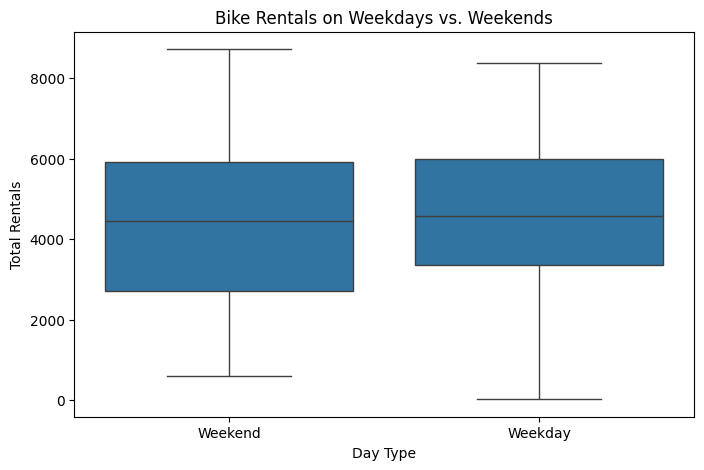

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='workingday', y='count', data=day_df)
plt.xticks([0, 1], ['Weekend', 'Weekday'])
plt.xlabel("Day Type")
plt.ylabel("Total Rentals")
plt.title("Bike Rentals on Weekdays vs. Weekends")
plt.show()

**Insight:**
- Dari boxplot, terlihat bahwa jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan.

- Hal ini menunjukkan bahwa banyak orang menggunakan sepeda untuk keperluan komuter seperti pergi ke kantor atau sekolah.

<ipython-input-36-a6d194701fd5>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='cnt', data=hour_df, estimator='mean', ci=None)


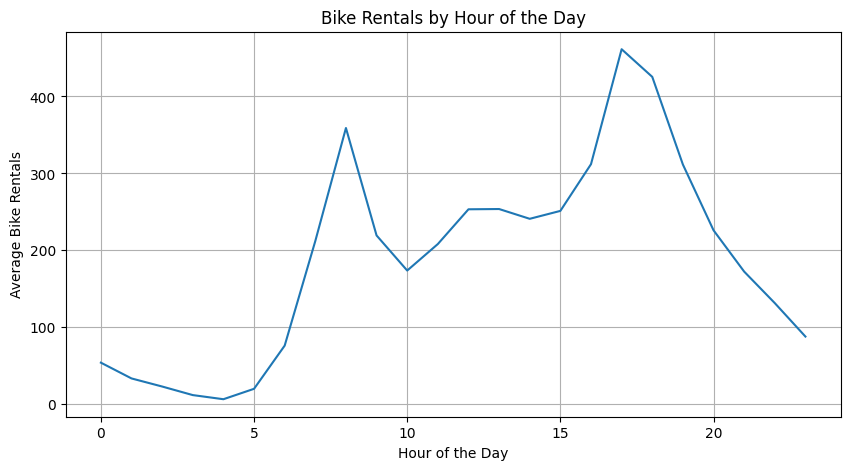

In [36]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='hr', y='cnt', data=hour_df, estimator='mean', ci=None)
plt.xlabel("Hour of the Day")
plt.ylabel("Average Bike Rentals")
plt.title("Bike Rentals by Hour of the Day")
plt.grid(True)
plt.show()

Dari line plot, terlihat bahwa penyewaan sepeda memiliki dua puncak utama: pagi sekitar pukul 8 dan sore sekitar pukul 17-18.
Pola ini mengindikasikan bahwa sepeda banyak digunakan untuk perjalanan ke dan dari tempat kerja atau sekolah.
Pada siang dan malam hari, jumlah penyewaan cenderung lebih rendah, dengan sedikit peningkatan pada malam hari, kemungkinan untuk rekreasi.

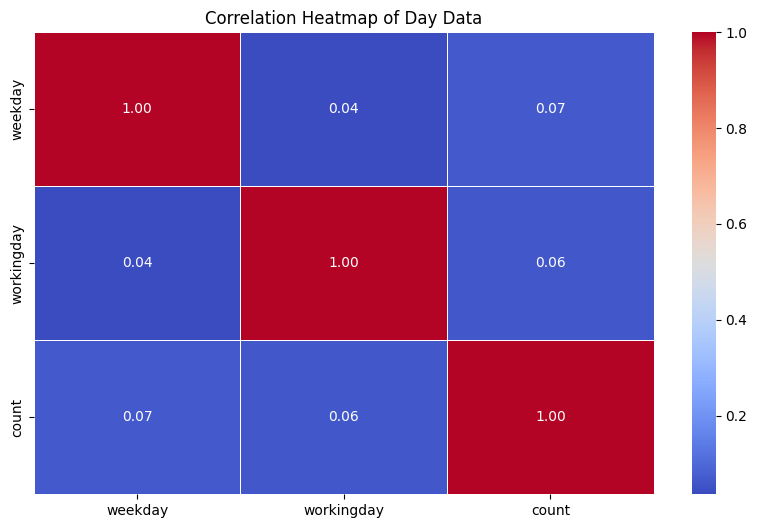

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(day_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Day Data")
plt.show()

Dari heatmap korelasi, dapat dilihat bahwa variabel seperti temperatur memiliki korelasi yang cukup tinggi terhadap jumlah penyewaan sepeda, sedangkan kelembaban dan kecepatan angin memiliki pengaruh negatif.
Hal ini berarti cuaca yang lebih hangat cenderung meningkatkan penyewaan, sementara kelembaban tinggi atau angin kencang dapat menurunkannya.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

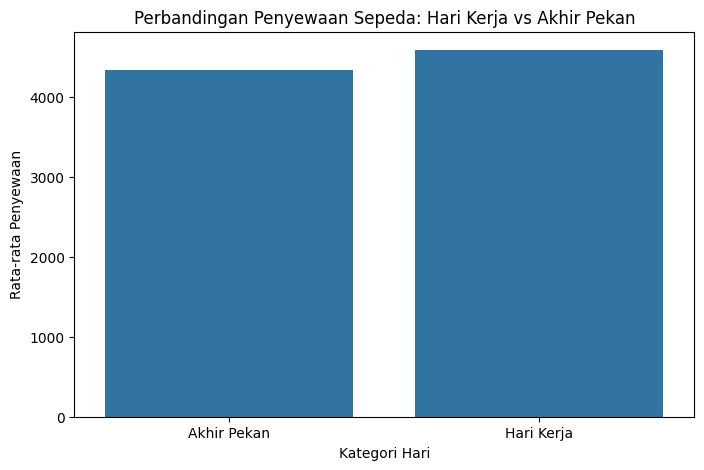

In [31]:
plt.figure(figsize=(8, 5))
sns.barplot(x=['Akhir Pekan', 'Hari Kerja'], y=day_df.groupby('workingday')['count'].mean().values)
plt.xlabel('Kategori Hari')
plt.ylabel('Rata-rata Penyewaan')
plt.title('Perbandingan Penyewaan Sepeda: Hari Kerja vs Akhir Pekan')
plt.show()

### Pertanyaan 2:

<ipython-input-32-81cc87eafaf8>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(x=hour_df.groupby('time_category')['cnt'].mean().index, y=hour_df.groupby('time_category')['cnt'].mean().values)


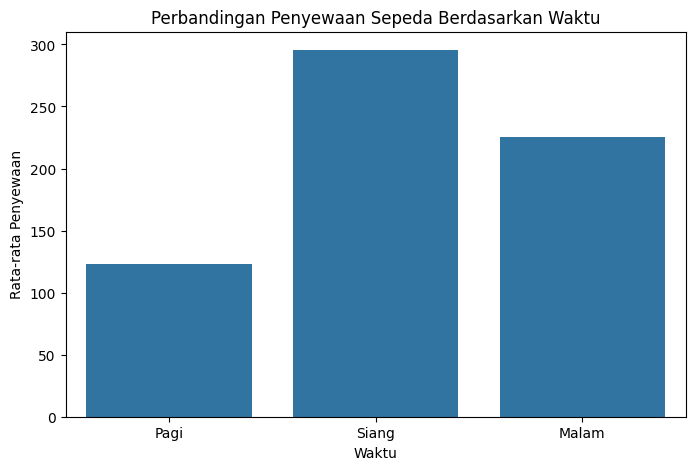

In [32]:
hour_df['time_category'] = pd.cut(hour_df['hr'], bins=[0, 11, 17, 23], labels=['Pagi', 'Siang', 'Malam'], right=True)


plt.figure(figsize=(8, 5))
sns.barplot(x=hour_df.groupby('time_category')['cnt'].mean().index, y=hour_df.groupby('time_category')['cnt'].mean().values)
plt.xlabel('Waktu')
plt.ylabel('Rata-rata Penyewaan')
plt.title('Perbandingan Penyewaan Sepeda Berdasarkan Waktu')
plt.show()


**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Jadi, kesimpulan yang dapat diambil dari analisis di atas, yaitu jumlah penyewaan sepeda lebih banyak ketika weekend, Hal ini menunjukkan bahwa banyak orang menggunakan sepeda untuk keperluan komuter seperti pergi ke kantor atau sekolah.
- Jumlah penyewa berdasarkan waktu, pagi sekitar pukul 8 dan sore sekitar pukul 17-18.
Pola ini mengindikasikan bahwa sepeda banyak digunakan untuk perjalanan ke dan dari tempat kerja atau sekolah.
Pada siang dan malam hari, jumlah penyewaan cenderung lebih rendah, dengan sedikit peningkatan pada malam hari, kemungkinan untuk rekreasi.